<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 27: Center and Spread

Associated Textbook Sections: [14.0 - 14.2](https://ccsf-math-108.github.io/textbook/chapters/14/Why_the_Mean_Matters.html)

---

## Outline

* [Center and Spread](#Center-and-Spread)
* [Average](#Average)
* [Standard Deviation](#Standard-Deviation)
* [Chebyshev's Inequality](#Chebyshev's-Inequality)
* [Standard Units](#Standard-Units)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Center and Spread

---

### Topic Motivation

* How can we quantify natural concepts like "center" and "variability"?
* Why do many of the empirical distributions that we generate come out bell shaped?
* How is sample size related to the accuracy of an estimate?

---

## Average

---

### The Average (or Mean)

* Example
    * Data: 2, 3, 3, 9    
    * The average of 4.25 is calculated as $\frac{2+3+3+9}{4}$
* Need not be a value in the collection
* Need not be an integer even if the data are integers
* Somewhere between min and max, but not necessarily halfway in between
* Same units as the data
* Smoothing operator: collect all the contributions in one big pot, then split evenly

---

### Demo: Average (Mean)

Explore various ways to calculate and interpret the average.

In [ ]:
values = make_array(2, 3, 3, 9)

In [ ]:
np.average(values)

4.25

In [ ]:
np.mean(values)

4.25

In [ ]:
sum(values) / len(values)

4.25

In [ ]:
(2 + 3 + 3 + 9) / 4

4.25

In [ ]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

---

Notice how the average reflects a physical balancing point for the data visualized through a histogram.

In [ ]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


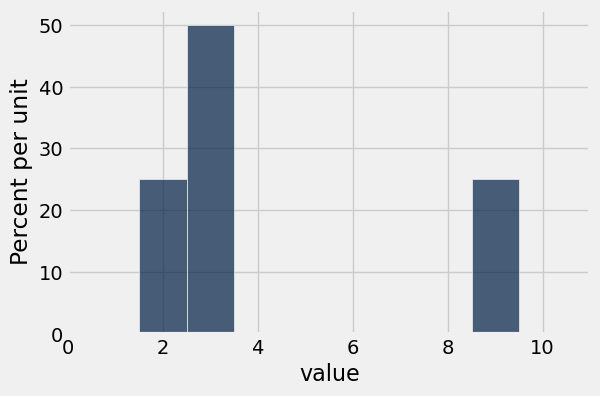

In [ ]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [ ]:
np.average(values)

4.25

In [ ]:
new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

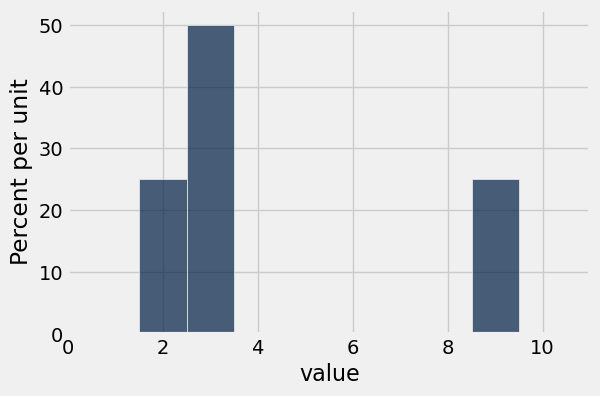

In [ ]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [ ]:
np.average(new_vals)

4.25

---

### Reflection

<img src="./histograms.png" width = 80%>

* Are the medians of these two distributions the same or different?
* Are the means the same or different?
* If you say "different," then say which one is bigger.

---

### Comparing Mean and Median

* Mean: Balance point of the histogram
* Median: Half-way point of data; half the area of histogram is on either side of median
* If the distribution is symmetric about a value, then that value is both the average and the median.
* If the histogram is skewed, then the mean is pulled away from the median in the direction of the tail.

---

### Reflection

<img src="./nba.png" width = 50%>

Is the mean or median larger for the distribution of NBA player heights?

---

## Standard Deviation

---

### Defining Variability

* Plan A: “biggest value - smallest value”
    * Doesn’t tell us much about the shape of the distribution
* Plan B:
    * Measure variability around the mean
    * Need to figure out a way to quantify this


---

### Demo: Standard Deviation

Develop the standard deviation formula.

In [ ]:
values = make_array(2, 3, 3, 9)

In [ ]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [ ]:
average_value = np.average(values)
average_value

4.25

In [ ]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [ ]:
sum(deviations)

0.0

In [ ]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [ ]:
variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [ ]:
sd = variance ** 0.5
sd

2.7726341266023544

In [ ]:
np.std(values)

2.7726341266023544

---

### How Far from the Average?

* Standard deviation (SD) measures roughly how far the data are from their average
* SD = root mean square of deviations from average
* SD has the same units as the data

---

### Why Use the SD?

There are two main reasons for us.

1. No matter what the shape of the distribution, the bulk of the data are in the range "average ± a few SDs" (Chebyshev's Inequality)
2. ... coming up in a future lecture.

---

## Chebyshev's Inequality

---

### How Big are Most of the Values?

* No matter what the shape of the distribution, the bulk of the data are in the range "average ± a few SDs"
* Chebyshev’s Inequality
    * No matter what the shape of the distribution, the proportion of values in the range "average ± $z$ SDs" is at least $1 - 1/z^2$



---

### Chebyshev's Bounds


No matter what the distribution looks like, the proportion of data values follows:

<img src="./cheby_bounds.png" width=50%>

---

### Demo: Chebyshev's Bound

Demonstrate Chebyshev's bounds through a data set.

In [ ]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [ ]:
# [:-1] excludes the last column label
numerical_labels = births.labels[:-1]
numerical_labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight')

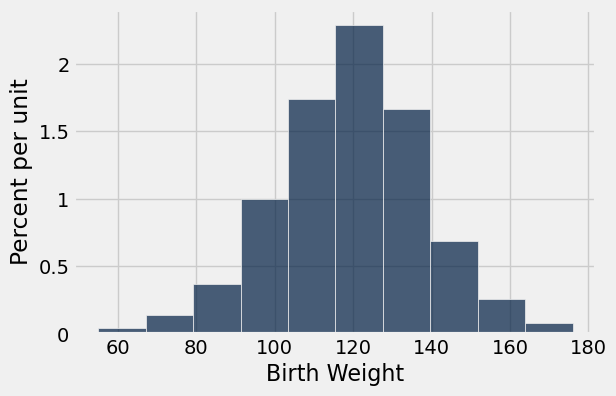

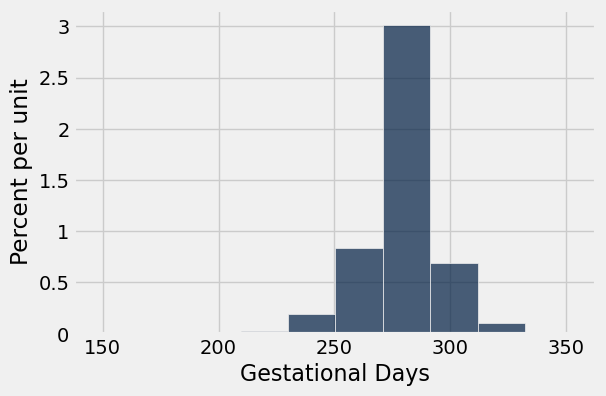

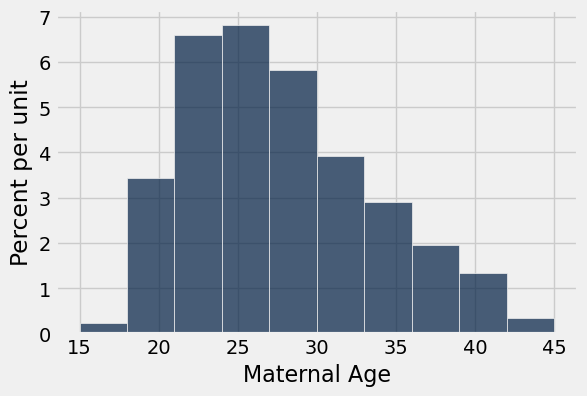

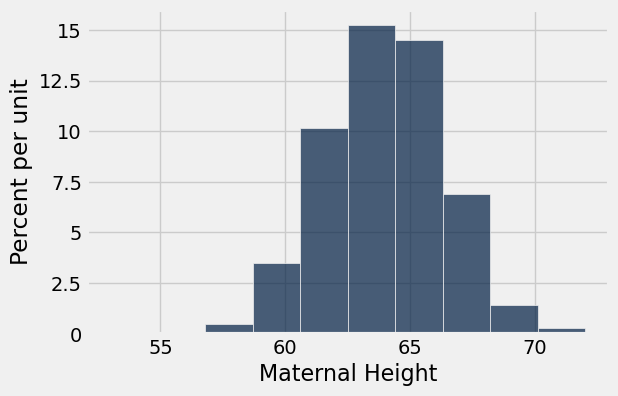

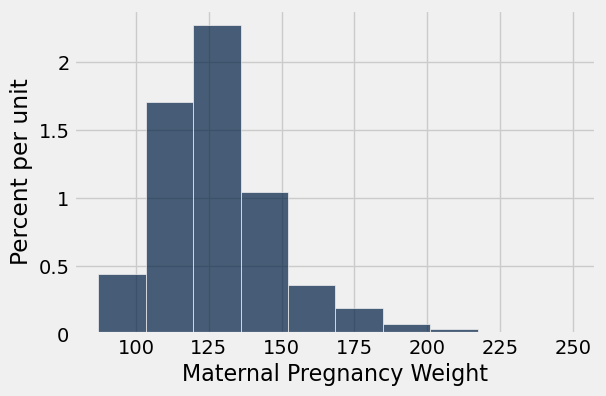

In [ ]:
for column_label in numerical_labels:
    births.hist(column_label)

In [ ]:
# Maternal Pregnancy Weight
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
print(f'The mean maternal pregnancy weight is {mean:.2f} kgs and the standard deviation for those weights is {sd:.2f} kgs.')

The mean maternal pregnancy weight is 128.48 kgs and the standard deviation for those weights is 20.73 kgs.


In [ ]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [ ]:
# Proportion within 3 SDs of the mean
actual_prop_3SD = within_3_SDs.num_rows / births.num_rows
actual_prop_3SD

0.9863713798977853

In [ ]:
# Chebyshev's bound: The proportion we calculated above should be at least
chebyshev_prop_3SD = 1 - 1/(3**2)
chebyshev_prop_3SD

0.8888888888888888

In [ ]:
# Interpreting "at least ..."
actual_prop_3SD >= chebyshev_prop_3SD

True

In [ ]:
for feature in numerical_labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Gestational Days
Average plus or minus 2 SDs: 93.78 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs: 99.57 % of the data
Average plus or minus 5 SDs: 99.83 % of the data

Maternal Age
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.91 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Height
Average plus or minus 2 SDs: 97.19 % of the data
Average plus or minus 3 SDs: 99.66 % of the data
Average plus or minus 4 SDs: 99.91 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs:

---

## Standard Units

---

### Standard Units

* How many SDs above average?
* `z = (value - average)/SD`
    * Negative z: value below average
    * Positive z: value above average
    * z = 0: value equal to average
* When values are in standard units: average = 0, SD = 1
* Gives us a way to compare/understand data no matter what the original units


---

### Demo: Standard Units

Create a function to convert a measurement to standard units and apply it to the previous data set.

In [ ]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [ ]:
ages = births.column('Maternal Age')

In [ ]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.8153604041908968)

In [ ]:
ages_standard_units = standard_units(ages)

In [ ]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [ ]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


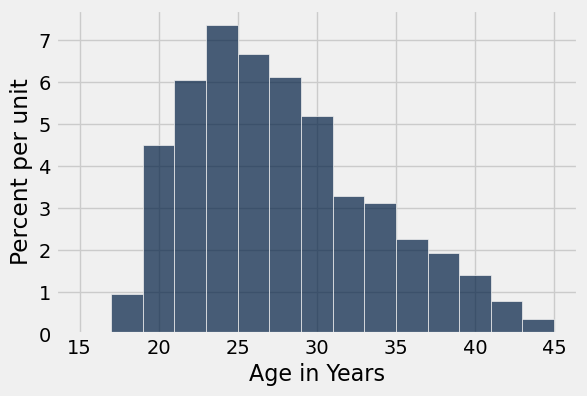

In [ ]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))
plt.show()

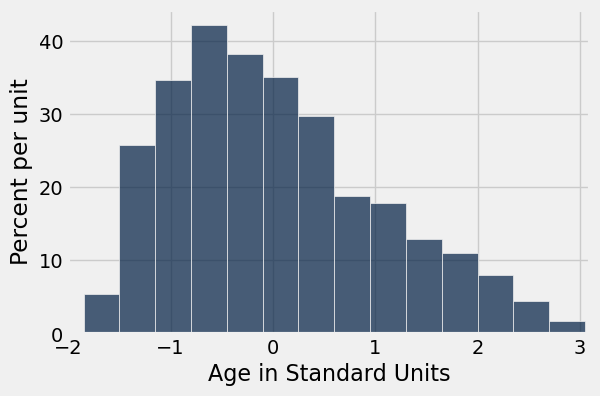

In [ ]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plt.xlim(-2, 3.1)
plt.show()

---

### The SD and the Histogram

* Usually, it's not easy to estimate the SD by looking at a histogram.
* But if the histogram has a bell shape, then you can.


---

### The SD and Bell-Shaped Curves

If a histogram is bell-shaped, then
* the average is at the center
* the SD is the distance between the average and the points of inflection on either side


---

### Demo: The SD and Bell Shaped Curves

Notice the way the distribution changes around $\pm 1$ of the mean.

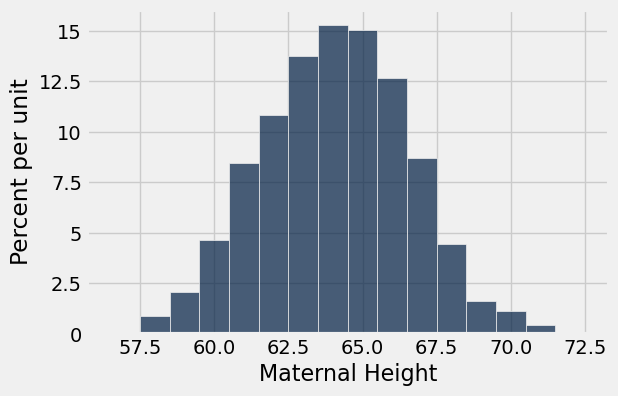

In [ ]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [ ]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.049403747870528, 2.5250254409674375)

In [ ]:
one_SD_above_mean = np.mean(heights) + np.std(heights)
one_SD_below_mean = np.mean(heights) - np.std(heights)
one_SD_above_mean, one_SD_below_mean

(66.574429188837968, 61.524378306903088)

---

### Point of Inflection

<img src="./inflection_points.png" width =50%>

The curvature of shape of the histogram changes at one standard deviation below the mean and one standard deviation above the mean.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>